In [355]:
import numpy as np
import matplotlib.pyplot as plt

In [356]:
# Load data
data_file_path = "PCB.dt"
data_points = np.loadtxt(data_file_path, delimiter="\t")
N = data_points.shape[0]

In [357]:
# Calculates MSE
def meanSquaredError(X, model, Y):
    # Take the first element since NumPy assumes the result of the sum is an array
    # This can never be true for our setup and data  
    return (sum(np.matmul(X, model) - Y)/np.shape(Y))[0]

In [358]:
def printModelParameters(name, X, model, Y):
    print(f"Model name: {name}")
    print(f"Parameters (w): {model}")
    print(f"MSE: {meanSquaredError(X, model, Y)}")

In [359]:
# TASK 1:
# Using the method provided in the lecture to compute the linear model
Y = data_points[:,1]
X = data_points[:,0]
tilde_X = np.array(list(zip(X, np.ones(N))))
pinv_X = np.linalg.pinv(tilde_X)
model_lin = np.transpose(np.matmul(pinv_X, Y))

printModelParameters("Linear model", tilde_X, model_lin, Y)


Model name: Linear model
Parameters (w): [ 1.55777052 -1.45194395]
MSE: -9.516197353929913e-16


In [360]:
# TASK 2:
log_Y = np.log(Y)
model_log = np.transpose(np.matmul(pinv_X, log_Y))
model_exp = np.exp(model_log)

# Mean squared error:
printModelParameters("non-linear model (h(x) = exp(ax + b))", tilde_X, model_exp, Y)

Model name: non-linear model (h(x) = exp(ax + b))
Parameters (w): [1.29579997 1.03197296]
MSE: 1.033722781995864


In [361]:
# TASK 3:
# Two data-points that does not have equality under the assumption from the assignment
p1 = [1, 2]
p2 = [1, 4]

fst_part = (p1[1] - np.dot(model_exp, [p1[0], 1]))**2 + (p2[1] - np.dot(model_exp, [p2[0], 1]))**2
snd_part = (np.log(p2[1]) - np.dot(model_log, [p2[0], 1]))**2 + (np.log(p2[1]) - np.dot(model_log, [p2[0], 1]))**2

print(f"fst: {fst_part}, snd: {snd_part}")
print(f"Equal(?): {abs(fst_part-snd_part) < 0.000001}")


fst: 2.9037784627356302, snd: 2.401089157370837
Equal(?): False


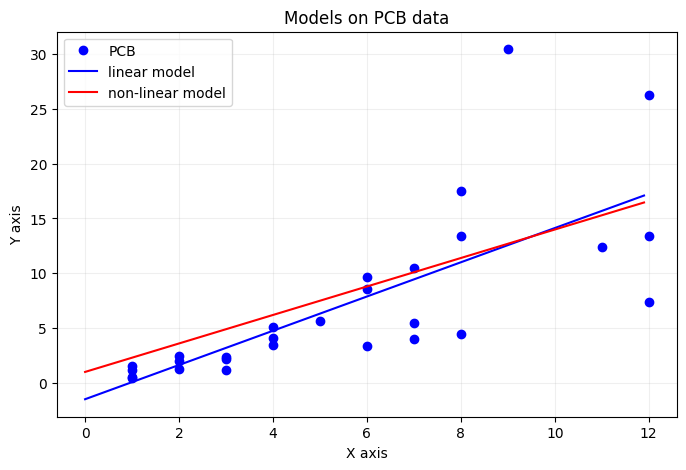

In [362]:
# Task 4:
fig, ax = plt.subplots(figsize=(8,5))

X_f = np.arange(0, np.max(X), 0.1,)
ax.plot(X, Y, 'bo', label="PCB")

# We must create some uniformly spaced coordinates so that we can draw the model-line
# (In effect, two would have sufficed since the model is linear)
uniform_X = np.array(list(zip(X_f, np.ones(np.shape(X_f)))))
ax.plot(X_f, np.matmul(uniform_X, model_lin), 'b-', label="linear model")
ax.plot(X_f, np.matmul(uniform_X, model_exp), 'r-', label="non-linear model")

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title("Models on PCB data")
ax.grid(alpha=0.2)
ax.legend()
plt.show()

fig.savefig('ModelsOnPCBData.png')

In [363]:
# R-squared calculator
def COD(X, model, Y):
    mean_Y = np.mean(Y)
    numerator = sum((Y - np.matmul(X, model))**2)
    denominator = sum((Y - mean_Y)**2)
    return 1 - numerator/denominator

In [364]:
# Task 5
print(f"R-squared (COD) of non-linear model (h(x) = exp(ax + b)): {COD(tilde_X, model_exp, Y)}") 


R-squared (COD) of non-linear model (h(x) = exp(ax + b)): 0.5071694014428316


Model name: non-linear model (h(x) = exp(a(sqrt(x)) + b)))
Parameters (w): [ 1.1986063  -1.19475082]
MSE: -5.705496204127272
R-squared (COD) of non-linear model (h(x) = exp(a(sqrt(x)) + b)) on tranformed labels: 0.7861056451320498


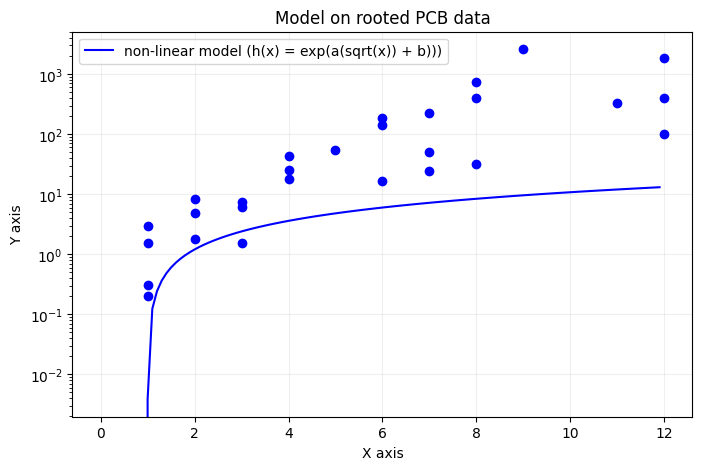

In [365]:
# Task 6
sqrt_X = np.sqrt(X)
sqrt_tilde_X = np.array(list(zip(sqrt_X, np.ones(N))))
sqrt_pinv_X = np.linalg.pinv(sqrt_tilde_X)
model_non_lin = np.transpose(np.matmul(sqrt_pinv_X, log_Y))

printModelParameters("non-linear model (h(x) = exp(a(sqrt(x)) + b)))", sqrt_tilde_X, model_non_lin, Y)

cod = COD(sqrt_tilde_X, model_non_lin, log_Y)
print(f"R-squared (COD) of non-linear model (h(x) = exp(a(sqrt(x)) + b)) on tranformed labels: {cod}")

fig, ax = plt.subplots(figsize=(8,5))
X_uniform = np.arange(0, np.max(X), 0.1)
tilde_X_uniform = np.array(list(zip(X_uniform, np.ones(np.shape(X_uniform)))))
ax.semilogy(X, 10**log_Y, 'bo')
ax.plot(X_uniform, np.matmul(tilde_X_uniform, model_non_lin), 'b-', label="non-linear model (h(x) = exp(a(sqrt(x)) + b)))")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title("Model on rooted PCB data")
ax.grid(alpha=0.2)
ax.legend()
plt.show()

fig.savefig('ModelsOnPCBData_LOG.png')
